# Fake News Detection

## Importing Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Importing Dataset

In [68]:
df_fake = pd.read_csv("../input/fake-news-detection/Fake.csv")
df_true = pd.read_csv("../input/fake-news-detection/True.csv")

In [69]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [70]:
df_true['text']

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 21417, dtype: object

## Inserting a column "class" as target feature

In [71]:
df_fake["class"] = 0
df_true["class"] = 1

In [72]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

## Merging True and Fake Dataframes

In [73]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [74]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [75]:
df_merge.shape

(44898, 5)

## Removing columns which are not required

In [76]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [77]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [78]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [79]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [80]:
df.columns

Index(['text', 'class'], dtype='object')

In [81]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


## Creating a function to process the texts

In [82]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [83]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [84]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [87]:
print(xv_train.shape)
print(xv_test.shape)

(33673, 95108)
(11225, 95108)


## Decision Tree Classification

Training accuracy of Decision Tree is 1.0
testing accuracy of Decision Tree is 0.995456570155902
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5872
           1       1.00      0.99      1.00      5353

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



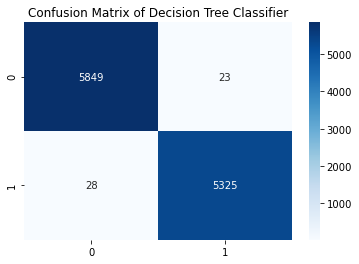

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
model=DecisionTreeClassifier()
model.fit(xv_train,y_train)
y_pred=model.predict(xv_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Training accuracy of Decision Tree is {model.score(xv_train,y_train)}")
print(f"testing accuracy of Decision Tree is {model.score(xv_test,y_test)}")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

## Multinomial Naive Bayes

Training accuracy of Multnomial Naive Bayes is 0.9431295102901435
testing accuracy of Multnomial Naive Bayes is 0.9327394209354121
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5872
           1       0.94      0.92      0.93      5353

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225



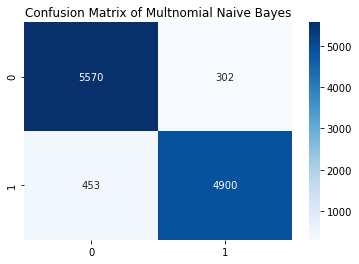

In [93]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(xv_train,y_train)
y_pred=model.predict(xv_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Training accuracy of Multnomial Naive Bayes is {model.score(xv_train,y_train)}")
print(f"testing accuracy of Multnomial Naive Bayes is {model.score(xv_test,y_test)}")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of Multnomial Naive Bayes")
plt.show()


## Support Vector Classifier

Training accuracy of SVM is 0.9981290648293886
testing accuracy of SVC is 0.9952783964365256
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5872
           1       1.00      0.99      1.00      5353

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



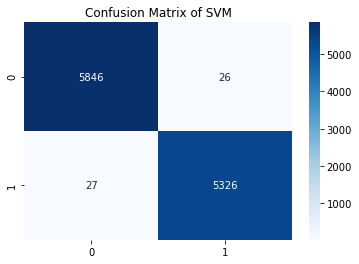

In [97]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(xv_train,y_train)
y_pred=model.predict(xv_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Training accuracy of SVM is {model.score(xv_train,y_train)}")
print(f"testing accuracy of SVC is {model.score(xv_test,y_test)}")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of SVM")
plt.show()